# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
## import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline
from scipy.optimize import curve_fit
import urllib
import time

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

# Data Gathering

In [3]:
## csv files read in
path = r'csse_covid_19_data/csse_covid_19_daily_reports'
all_files = glob.glob(path + "/*.csv")
## concat into one file
li = []

for filename in all_files:
    df = pd.read_csv(filename, header=0)
    """if there is no new confirms on that day, 'Last Update' will stay at yesterday,
    this will have a misleading result on the plot when we draw accumulated confirmed cases by date,
    therefor we change the 'Last Update' to as same as the file name, which is the calendar date
    """
    df['Last Update']= filename[-14:-4]
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True, sort= True)

In [4]:
frame

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
0,1.0,Mainland China,NaN,01-22-2020,NaN,NaN,Anhui,NaN
1,14.0,Mainland China,NaN,01-22-2020,NaN,NaN,Beijing,NaN
2,6.0,Mainland China,NaN,01-22-2020,NaN,NaN,Chongqing,NaN
3,1.0,Mainland China,NaN,01-22-2020,NaN,NaN,Fujian,NaN
4,NaN,Mainland China,NaN,01-22-2020,NaN,NaN,Gansu,NaN
...,...,...,...,...,...,...,...,...
5624,1.0,US,0.0,03-14-2020,18.3358,-64.8963,"Virgin Islands, U.S.",0.0
5625,1.0,United Kingdom,0.0,03-14-2020,36.1408,-5.3536,Gibraltar,1.0
5626,0.0,Australia,0.0,03-14-2020,35.4437,139.6380,From Diamond Princess,0.0
5627,0.0,US,0.0,03-14-2020,38.4912,-80.9545,West Virginia,0.0


# Data Cleaning

In [5]:
## rename two columns with non-sensitive notation
frame.rename(columns ={'Country/Region':'Country_Region','Province/State':'Province_State',
                       'Last Update':'Last_Update'}, inplace= True)

In [6]:
## filter out US and China
df = frame.query('Country_Region == "US" or Country_Region == "China" or Country_Region == "Mainland China"')
## replace "Mainland China" with "China"
df['Country_Region'].replace('Mainland China','China',inplace= True)

In [7]:
## test
df['Country_Region'].value_counts()

China    1649
US       1162
Name: Country_Region, dtype: int64

In [8]:
## check duplicates
df.duplicated().any()

False

In [9]:
## rerange columns
df = df[['Province_State','Country_Region','Last_Update','Confirmed','Deaths','Recovered','Latitude','Longitude']]

In [10]:
## test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2811 entries, 0 to 5627
Data columns (total 8 columns):
Province_State    2811 non-null object
Country_Region    2811 non-null object
Last_Update       2811 non-null object
Confirmed         2799 non-null float64
Deaths            2529 non-null float64
Recovered         2568 non-null float64
Latitude          1234 non-null float64
Longitude         1234 non-null float64
dtypes: float64(5), object(3)
memory usage: 197.6+ KB


In [11]:
## fill NaN with 0 in 'Confirmed','Deaths','Recovered'
df[['Confirmed','Deaths','Recovered']]= df[['Confirmed','Deaths','Recovered']].fillna(0)
df

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,China,01-22-2020,1.0,0.0,0.0,NaN,NaN
1,Beijing,China,01-22-2020,14.0,0.0,0.0,NaN,NaN
2,Chongqing,China,01-22-2020,6.0,0.0,0.0,NaN,NaN
3,Fujian,China,01-22-2020,1.0,0.0,0.0,NaN,NaN
4,Gansu,China,01-22-2020,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
5589,Wyoming,US,03-14-2020,2.0,0.0,0.0,42.7560,-107.3025
5599,Tibet,China,03-14-2020,1.0,0.0,1.0,31.6927,88.0924
5623,North Dakota,US,03-14-2020,1.0,0.0,0.0,47.5289,-99.7840
5624,"Virgin Islands, U.S.",US,03-14-2020,1.0,0.0,0.0,18.3358,-64.8963


In [12]:
## change datatype
integer = ['Confirmed','Deaths','Recovered']
datetime = ['Last_Update']
datatypes = ['int','datetime64']
columns = [integer,datetime]
for column,datatype in zip(columns,datatypes):
    df[column]= df[column].astype(datatype)

In [13]:
## trim down HH-MM-SS
df['Last_Update'] = df['Last_Update'].values.astype('<M8[D]')

In [14]:
## reset index
df.reset_index(inplace= True)
## drop old index
df.drop(['index'],axis =1,inplace= True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 8 columns):
Province_State    2811 non-null object
Country_Region    2811 non-null object
Last_Update       2811 non-null datetime64[ns]
Confirmed         2811 non-null int32
Deaths            2811 non-null int32
Recovered         2811 non-null int32
Latitude          1234 non-null float64
Longitude         1234 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(3), object(2)
memory usage: 142.9+ KB


In [16]:
## Add fatality rate and recovery rate
df['fatality_rate'] = df['Deaths']/df['Confirmed']
df['recovery_rate'] = df['Recovered']/df['Confirmed']

In [17]:
## test
df.head()

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude,fatality_rate,recovery_rate
0,Anhui,China,2020-01-22,1,0,0,NaN,NaN,0.0,0.0
1,Beijing,China,2020-01-22,14,0,0,NaN,NaN,0.0,0.0
2,Chongqing,China,2020-01-22,6,0,0,NaN,NaN,0.0,0.0
3,Fujian,China,2020-01-22,1,0,0,NaN,NaN,0.0,0.0
4,Gansu,China,2020-01-22,0,0,0,NaN,NaN,NaN,NaN


In [18]:
print(df.query('Country_Region == "China"').shape[0],df.query('Country_Region == "US"').shape[0])

1649 1162


In [19]:
## break data by contries for future analyzation
usdf = df.query('Country_Region == "US"')
cndf = df.query('Country_Region == "China"')

### What is the structure of your dataset?

> There are 28114 records in totoal, 1649 records in China and 1162 records in US. Information is recorded from 2020 Jan 22nd until 2020 Mar 14th.

### What is/are the main feature(s) of interest in your dataset?

> The relationship among Confirmed,Deaths,Recovered with time goes on in two different countries.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Confirmed,Deaths,Recovered are key metrics. With some engineering will result different ratios.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.



In [20]:
usdf.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude,fatality_rate,recovery_rate
count,1162.000000,1162.000000,1162.000000,788.000000,788.000000,1088.000000,1088.000000
mean,10.389845,0.272806,0.180723,38.572532,-93.587059,0.009780,0.080362
std,42.714609,2.331029,0.538003,5.648166,37.209191,0.066996,0.249630
min,0.000000,0.000000,0.000000,18.220800,-157.858400,0.000000,0.000000
25%,1.000000,0.000000,0.000000,35.443700,-118.760600,0.000000,0.000000
50%,2.000000,0.000000,0.000000,39.059800,-93.900200,0.000000,0.000000
75%,4.000000,0.000000,0.000000,42.165700,-79.025100,0.000000,0.000000
max,572.000000,37.000000,6.000000,61.370716,139.638000,1.000000,1.000000


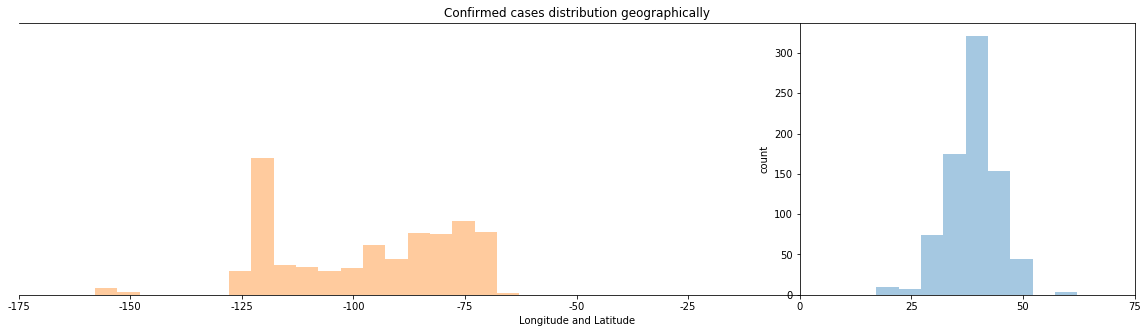

In [21]:
## set bin edge
bin_edge = np.arange(usdf['Longitude'].min(),usdf['Latitude'].max()+5,5)
## plot
plt.figure(figsize =(20,5))
## set y axis to x= 0
plt.axes().spines['left'].set_position(('data',0))
sns.distplot(usdf['Latitude'],bins =bin_edge,kde =False)
sns.distplot(usdf['Longitude'], bins =bin_edge, kde= False)
## set xticks
tick = np.arange(-175,100, 25)
plt.xticks(tick,tick)
## set labels
plt.xlabel('Longitude and Latitude')
plt.ylabel('count')
plt.title('Confirmed cases distribution geographically');

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Given the fact that this plot is based on frequencies of geographical values show up in the data set, we don’t expect any correlation or normal distribution show up in the plot but only to reflect the way COVID spread out on the geographical term. 
The plot shows the virus on record is between (-160, -65) in longitude and between(20,65) in latitude. In relate, Lat-long coorditates for cities in United States are in range: Latitude from 19.50139 to 64.85694 and longitude from -161.75583 to -68.01197. This match up what we have in the plot.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> More specific, there are two humps in the Longitude distribution plot, they reflect more cases on record on both coasts. Other the other hand, there is a significant high volume in the latitude plot which occurs around 40 to 45 latitude. This draws my attention to WA, Northern CA, OR and Northern east states around NY.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

###### accumulated numbers among states
Bacause Confirmed,Deaths,Recovered are accumulative numbers, I decided to use the most up-to-date record, which is on Mar 14th to preseed following investigation.

In [22]:
## mask
mask = usdf.query('Last_Update == "03-14-2020"')

In [23]:
## set up iterables
deathcols = ['Deaths','fatality_rate']
recovercols= ['Recovered','recovery_rate']
plotpos =[121,122]
def statenum(colums):
    plt.figure(figsize=(20,10))
    ## sort values descending
    if colums =='Confirmed':
        statedesc = mask.groupby('Province_State')[colums].sum().sort_values(ascending= False)
        sns.barplot(data=mask, x= statedesc.values,y = statedesc.index, color ='c')
        plt.xlabel(colums)
        plt.title('Total confirmed cases each state')
    ## limit result returned by 10 with small recoreds size
    else:
        for colum, plotpo in zip(colums,plotpos):
            plt.subplot(plotpo)
            i = mask.groupby('Province_State')[colum].sum().sort_values(ascending= False)[:12]
            sns.barplot(data=mask, y= i.values,x = i.index, color ='c')
            plt.xticks(rotation =15)
            plt.ylabel(colum)
            plt.title('Top 12 {} states'.format(colum))

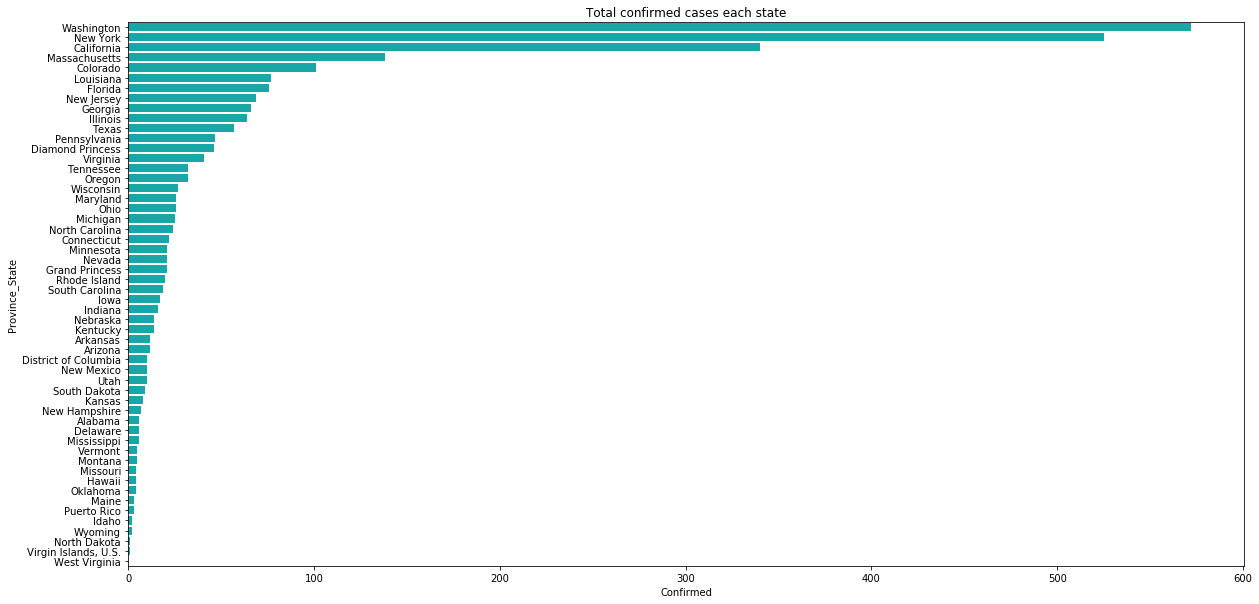

In [24]:
statenum('Confirmed')

> This agree with my hypothesis: Northern east and Northern west states have the most cases reported. Top four significant states are WA, NY, CA and MA.

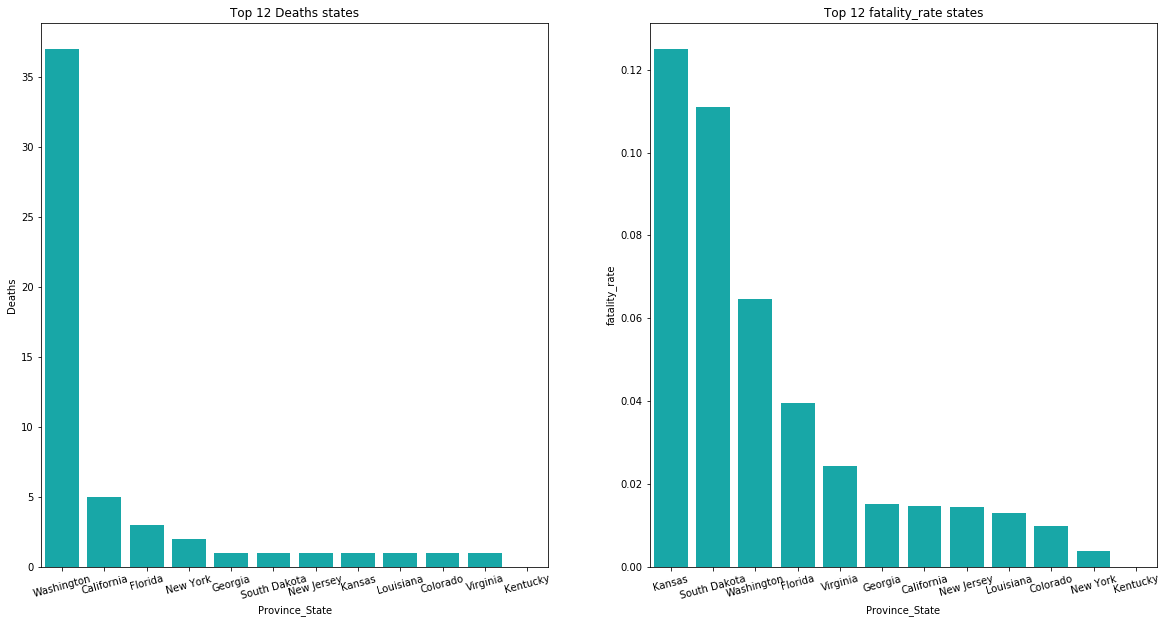

In [25]:
statenum(deathcols)

> total deaths show different results than fatality rate

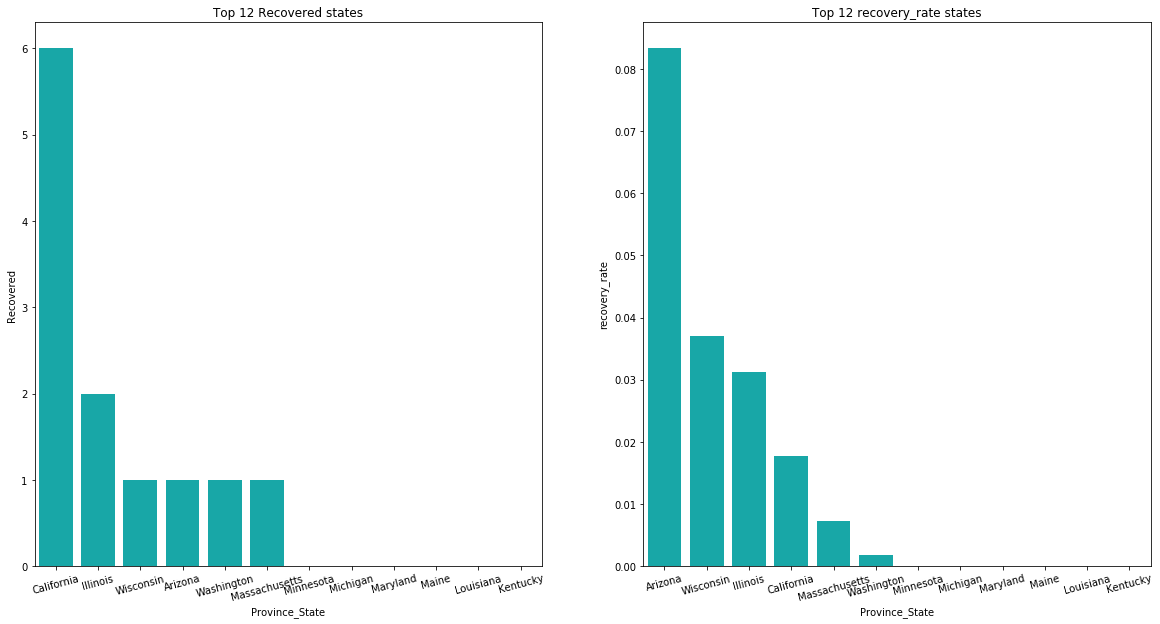

In [26]:
statenum(recovercols)

> total recoverying show different results than recovery rate

###### Accumulate confirmed cases along time

In [27]:
def timematric(matric):
    plt.figure(figsize=(20,5))
    usdata = usdf.groupby('Last_Update')[matric].sum()
    sns.lineplot(data=usdf, x =usdata.index, y = usdata.values )
    plt.title('Accumulate {} cases along time'.format(matric))

C:\Users\victo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


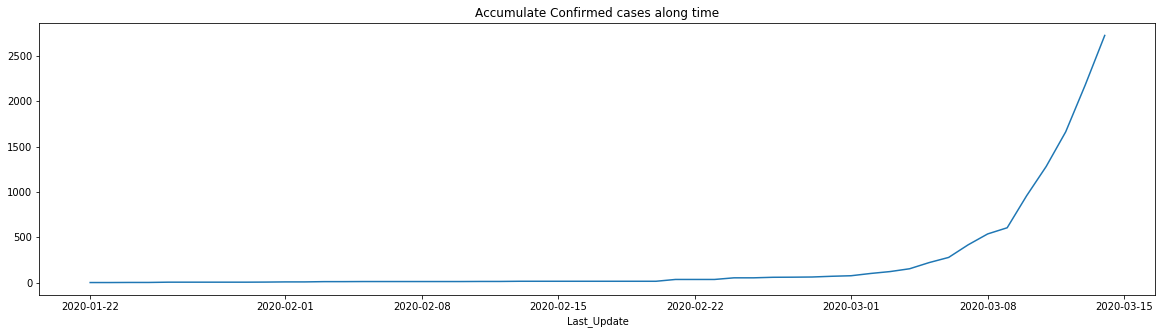

In [28]:
timematric('Confirmed')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the confirmed cases number each state we can see top four significant states are WA, NY, CA and MA. This agree with my hypothesis: Northern east and Northern west states have the most cases reported. From the accumulate confirmed cases plot we can see a boost around March 1st.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The total deaths/state and fatality rate as well as total recoveries/state and recovery rate are paired based on the same group of data but showing a different result. They also suggest slightly different messages, using ratios might be a better way to compare event/person by state.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

###### Comparing COVID spread out speed within China and U.S.

In [29]:
## aggregate by conuntry then create multi index series
countrydf = df.groupby(['Country_Region','Last_Update'])[['Confirmed','Deaths','Recovered']].sum()
## reset index
countrydf = countrydf.reset_index()

In [30]:
## test
countrydf

,Country_Region,Last_Update,Confirmed,Deaths,Recovered
0,China,2020-01-22,547,17,28
1,China,2020-01-23,639,18,30
2,China,2020-01-24,916,26,36
3,China,2020-01-25,1399,42,39
4,China,2020-01-26,2062,56,49
...,...,...,...,...,...
101,US,2020-03-10,959,28,8
102,US,2020-03-11,1281,36,8
103,US,2020-03-12,1663,40,12
104,US,2020-03-13,2179,47,12


In [31]:
## function for compute logarithm and antilogarithm
def logtrans(x, inverse= False):
    if not inverse:
        return np.log10(x)
    else:
        return 10 ** x

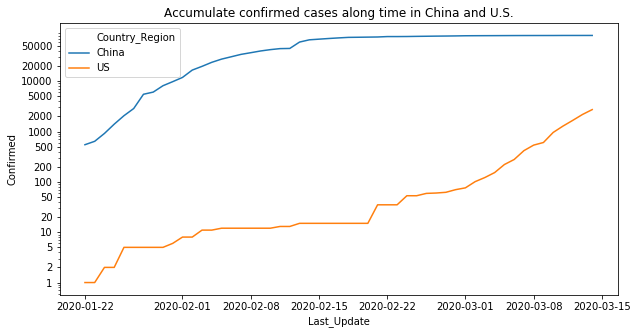

In [32]:
## transform y scale to log10 in order 
## to counter big population difference
plt.figure(figsize=(10,5))
plt.yscale('log')
sns.lineplot(data=countrydf, x ='Last_Update', y = 'Confirmed',hue= 'Country_Region' )
tick = [1,2,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000]
plt.yticks(tick,tick)
plt.legend(loc =0)
plt.title('Accumulate confirmed cases along time in China and U.S.');

> Here we have a plot showing accumulate confirmed cases along time between China and U.S.. There is a worrisome trend, from Jan 22nd the first COVID-19 case was observed in the U.S. it has been slowly spreading out unilt Fed 22nd a big population was infected and it started to spread out fast, giving the same frame of time the virus is spreading faster in the U.S. than in China at this moment.

###### Total Recovered and total Deaths between two countries

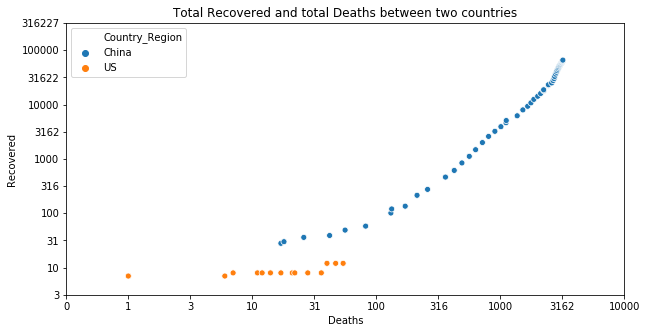

In [33]:
plt.figure(figsize=(10,5))
## perform log transformation
sns.scatterplot(data= countrydf,y= countrydf['Recovered'].apply(logtrans),
                x =countrydf['Deaths'].apply(logtrans), hue= 'Country_Region')
## get x,t ticks locations and labels
xlocs, xlabels= plt.xticks()
ylocs, ylabels= plt.yticks()
## transform labels
xlabels = logtrans(xlocs, inverse= True).astype(int)
ylabels = logtrans(ylocs, inverse= True).astype(int)
plt.xticks(xlocs, xlabels)
plt.yticks(ylocs, ylabels)
plt.legend(loc= 0)
plt.title('Total Recovered and total Deaths between two countries');

> Scatter plot show a relationship between total Recovered and total Deaths within two countries. This make sense because more recovered reflect more cases confirmed which will lead to more deaths. What we want to see is a steep slop along those spots, the steeper slop is the more people recovered than died. In this case, China shows a more comforting result.

###### Average ratio comparisons

In [34]:
## Add fatality rate and recovery rate
countrydf['fatality_rate'] = countrydf['Deaths']/countrydf['Confirmed']
countrydf['recovery_rate'] = countrydf['Recovered']/countrydf['Confirmed']
countrydf

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,fatality_rate,recovery_rate
0,China,2020-01-22,547,17,28,0.031079,0.051188
1,China,2020-01-23,639,18,30,0.028169,0.046948
2,China,2020-01-24,916,26,36,0.028384,0.039301
3,China,2020-01-25,1399,42,39,0.030021,0.027877
4,China,2020-01-26,2062,56,49,0.027158,0.023763
...,...,...,...,...,...,...,...
101,US,2020-03-10,959,28,8,0.029197,0.008342
102,US,2020-03-11,1281,36,8,0.028103,0.006245
103,US,2020-03-12,1663,40,12,0.024053,0.007216
104,US,2020-03-13,2179,47,12,0.021570,0.005507


In [35]:
uptodate = countrydf.query('Last_Update=="2020-03-14"')
uptodate

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,fatality_rate,recovery_rate
52,China,2020-03-14,80977,3193,65660,0.039431,0.810848
105,US,2020-03-14,2726,54,12,0.019809,0.004402


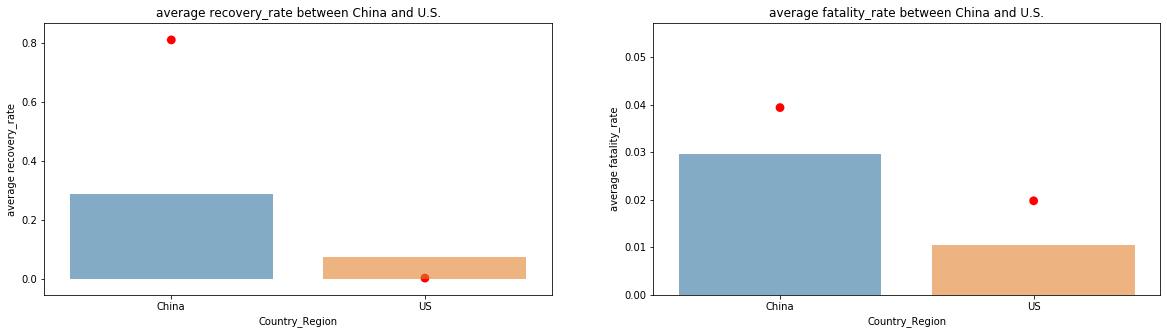

In [36]:
indexes = [121, 122]
columnames =['recovery_rate','fatality_rate']
plt.figure(figsize=(20,5))
for index, columname in zip(indexes,columnames):
    plt.subplot(index)
    sns.pointplot(data = uptodate, x = 'Country_Region', y= columname,color ='r',join =False,edgecolors="white")
    sns.barplot(data= countrydf, x= 'Country_Region', y= columname, ci= False, alpha = 0.6)
    ## use red dot to indicate most recent rates
    plt.ylabel('average {}'.format(columname))
    plt.title('average {} between China and U.S.'.format(columname));

> Plots above compare average recovery rate as well as average fatality rate between two contries. Fortunately both counrties showing a higher average recovery rate than average fatality rate. Red dots represent rates on Mar 15th respectively.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> "Total Recovered and total Deaths between two contries" plot show a relationship between total Recovered and total Deaths within two countries. This make sense because more recovered reflect more cases confirmed which will lead to more deaths. What we want to see is a steep slop along those spots, the steeper slop is the more people recovered than died. In this case, China shows a more comforting result.
### Were there any interesting or surprising interactions between features?

> "Accumulate confirmed cases along time in China and U.S." shows a worrisome trend, from Jan 22nd the first COVID-19 case was observed in the U.S. it has been slowly spreading out unilt Fed 22nd a big population was infected and it started to spread out fast, giving the same frame of time the virus is spreading faster in the U.S. than in China at this moment.

## A rough forecast

In [37]:
dummydf = countrydf.query('Country_Region=="US"')
dummydf.tail()

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,fatality_rate,recovery_rate
101,US,2020-03-10,959,28,8,0.029197,0.008342
102,US,2020-03-11,1281,36,8,0.028103,0.006245
103,US,2020-03-12,1663,40,12,0.024053,0.007216
104,US,2020-03-13,2179,47,12,0.021570,0.005507
105,US,2020-03-14,2726,54,12,0.019809,0.004402


In [38]:
## function for obtain dates from Jan 22nd
def get_date_list(target_month = 3):
    month_day = [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    cur_month, cur_day = 1, 22
    ans = []
    while cur_month <= target_month:
        while cur_day <= month_day[cur_month]:
            d = "0" + str(cur_day) if cur_day < 10 else str(cur_day)
            ans += [str(cur_month) + "/" + d]
            cur_day += 1
        cur_day = 1
        cur_month += 1
    return ans

In [39]:
## logistic function model
def logistic_function(t, K, P0, r):
    t0 = 0
    exp = np.exp(r * (t - t0))
    return (K * exp * P0) / (K + (exp - 1) * P0)

In [40]:
## main function body
def predict(dayfram):
    ## how many days to predicte from Jan 22nd
    ## aka dayfram
    predict_days = dayfram
    
    date, confirm = dummydf['Last_Update'].values, dummydf['Confirmed'].values
    x = np.arange(len(confirm))
    date_labels = get_date_list(4)

    ## convert least sqrt
    popt, pcov = curve_fit(logistic_function, x, confirm)
    print(popt)
     
    predict_x = list(x) + [x[-1] + i for i in range(1, 1 + predict_days)]
    predict_x = np.array(predict_x)
    predict_y = logistic_function(predict_x, popt[0], popt[1], popt[2])
    
    ## plot
    plt.figure(figsize=(20, 10))
    plt.plot(predict_x, predict_y, 's',label="predicted infected number")
    plt.plot(x, confirm, 'o',label="confimed infected number")
    plt.xticks(predict_x, date_labels[:len(predict_x) + 1], rotation=90)
       
    plt.suptitle("Logistic Fitting Curve for COVID-19 infected numbers(Max infections: {},  r:{:.3})".format(int(popt[0]), popt[2]), fontsize=16, fontweight="bold")
    plt.title("Predict time:{}".format(time.strftime("%Y-%m-%d", time.localtime())), fontsize=16)
    plt.xlabel('date', fontsize=14)
    plt.ylabel('infected number', fontsize=14)
    plt.legend(loc= 0)

[1.19983860e+04 3.58297823e-04 3.09863514e-01]


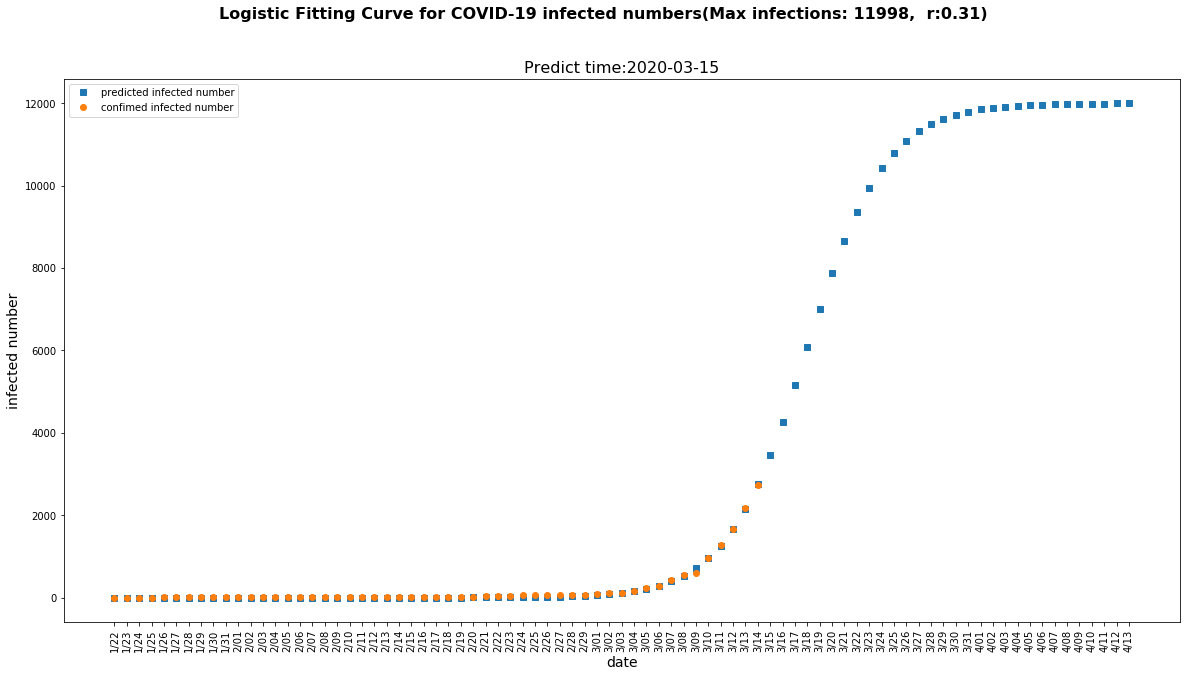

In [41]:
## call function 
predict(30)

> Above is a prediction model using logistic growth algorithm. In the title, max infections represent predicited maximum total confirmed cases, r is the per capita rate of increase, the greater r is the faster to reach the peak point. As the model shows, max confirmed cases would likely be around 11998, which will happen around April 6th. This model has very limited perspective, dataset is not large enough to train the model at this point(represented by orange dots), also it has not yet take other elements into consideration, eg SEIR model, SIRS model, susceptible and infective mobility, medical break though and many more.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!